In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings 
warnings.simplefilter('ignore')
%config InlineBackend.figure_format = 'retina'
pd.options.mode.chained_assignment = None
def _rc(figsize=[10, 6], font_size=22, tics=16):
    pd.set_option('display.float_format', lambda x: '%.3f' % x)
    rc={'font.size': font_size, 'axes.labelsize': font_size, 'legend.fontsize': font_size, 
        'axes.titlesize': font_size, 'xtick.labelsize': tics - 4, 'ytick.labelsize': tics,
        'legend.fontsize': tics -1, 'figure.figsize': figsize}
    plt.rcParams.update(**rc)
    sns.set(style='white', rc=rc)
_rc()
%pprint on

Pretty printing has been turned ON


In [15]:
df = pd.read_json('data.json')
df.head(4)

,AC,Bath_room,Bed_room,Build_Size,D_from_Airport,D_from_Marin,D_from_beach,D_from_city,D_from_countryside,D_golfcourse,Garage,Heating,Plot_Size,Pool,WC,property_description,property_name,property_price
0,NO,2.000,3.000,89 m,NaN,NaN,NaN,NaN,NaN,NaN,NO,NO,217 m,YES,nan,These villas offer a spacious living room with...,"Villa for sale in Roda, Murcia","265,000"
1,NO,3.000,4.000,220 m,NaN,NaN,NaN,NaN,NaN,NaN,NO,NO,1041 m,NO,nan,DIRECTLY FROM THE OWNER: Modern Ibiza style ho...,"Villa for sale in Cala d'Or, Mallorca","1,200,000"
2,NO,5.000,4.000,300 m,NaN,NaN,NaN,NaN,NaN,NaN,NO,NO,1300 m,YES,nan,This beautiful detached villa is located in Vi...,"Villa for sale in Villamartin, Alicante","1,590,000"
3,NO,2.000,3.000,154 m,NaN,NaN,NaN,NaN,NaN,NaN,NO,NO,807 m,YES,nan,This modern villa is located in Cumbre del Sol...,"Villa for sale in Benitachell / Benitatxell, A...","600,000"


In [16]:
df.dtypes


AC                       object
Bath_room               float64
Bed_room                float64
Build_Size               object
D_from_Airport           object
D_from_Marin             object
D_from_beach             object
D_from_city              object
D_from_countryside       object
D_golfcourse             object
Garage                   object
Heating                  object
Plot_Size                object
Pool                     object
WC                      float64
property_description     object
property_name            object
property_price           object
dtype: object

As we can see our data is not upto the mark. There are some character "m" in Build_Size and Plot_size. And also we need to convert some of obejct columns in numeric colums. 

In [17]:
df['Bath_room'] = pd.to_numeric(df['Bath_room'], errors='coerce', downcast='integer')
df['Bed_room'] = pd.to_numeric(df['Bed_room'], errors='coerce', downcast='integer')
df['Build_Size'] = df['Build_Size'].astype(str).str[:-2].apply(pd.to_numeric, errors='coerce')
df['Plot_Size'] = df['Plot_Size'].astype(str).str[:-2].apply(pd.to_numeric, errors='coerce')
df['D_from_Airport'] = df['D_from_Airport'].astype(str).str[:-2].apply(pd.to_numeric, errors='coerce')
df['D_from_Marin'] = df['D_from_Marin'].astype(str).str[:-2].apply(pd.to_numeric, errors='coerce')
df['D_from_beach'] = df['D_from_beach'].astype(str).str[:-2].apply(pd.to_numeric, errors='coerce')
df['D_from_city'] = df['D_from_city'].astype(str).str[:-2].apply(pd.to_numeric, errors='coerce')
df['D_from_countryside'] = df['D_from_countryside'].astype(str).str[:-2].apply(pd.to_numeric, errors='coerce')
df['D_golfcourse'] = df['D_golfcourse'].astype(str).str[:-2].apply(pd.to_numeric, errors='coerce')
df['property_price'] = df['property_price'].apply(pd.to_numeric, errors='coerce')


In [18]:
df.dtypes


AC                       object
Bath_room               float64
Bed_room                float64
Build_Size              float64
D_from_Airport          float64
D_from_Marin            float64
D_from_beach            float64
D_from_city             float64
D_from_countryside      float64
D_golfcourse            float64
Garage                   object
Heating                  object
Plot_Size               float64
Pool                     object
WC                      float64
property_description     object
property_name            object
property_price          float64
dtype: object

We have successfully converted data in desired data type so that statistical analysis can be done. Let's look at data using basic descriptive statistics.

In [19]:
df.describe()

,Bath_room,Bed_room,Build_Size,D_from_Airport,D_from_Marin,D_from_beach,D_from_city,D_from_countryside,D_golfcourse,Plot_Size,WC,property_price
count,92351.000,92803.000,92804.000,3852.000,3495.000,2994.000,4295.000,2587.000,1913.000,48119.000,1147.000,0.000
mean,2.483,3.350,574.775,42.067,16.149,14.096,16.624,5.485,14.535,19597.247,1.715,nan
std,1.782,1.847,32370.386,31.449,19.194,22.988,286.134,9.731,12.578,2965679.244,1.445,nan
min,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,nan
25%,2.000,2.000,95.000,18.000,2.000,1.000,0.400,0.000,4.000,250.000,1.000,nan
50%,2.000,3.000,142.000,40.000,10.000,6.000,2.000,1.000,10.000,800.000,1.000,nan
75%,3.000,4.000,250.000,60.550,25.000,20.000,7.000,5.000,23.000,1937.000,2.000,nan
max,128.000,128.000,9500000.000,501.000,360.000,800.000,17000.000,79.000,60.000,650000000.000,25.000,nan


After looking at median value and maximum value it gives me notion that every column have outlier. Let's remove every data point which have outlier in any column. 

Text(0.5,1,'NO OF PROPERTY BY NO OF BATHROOM')

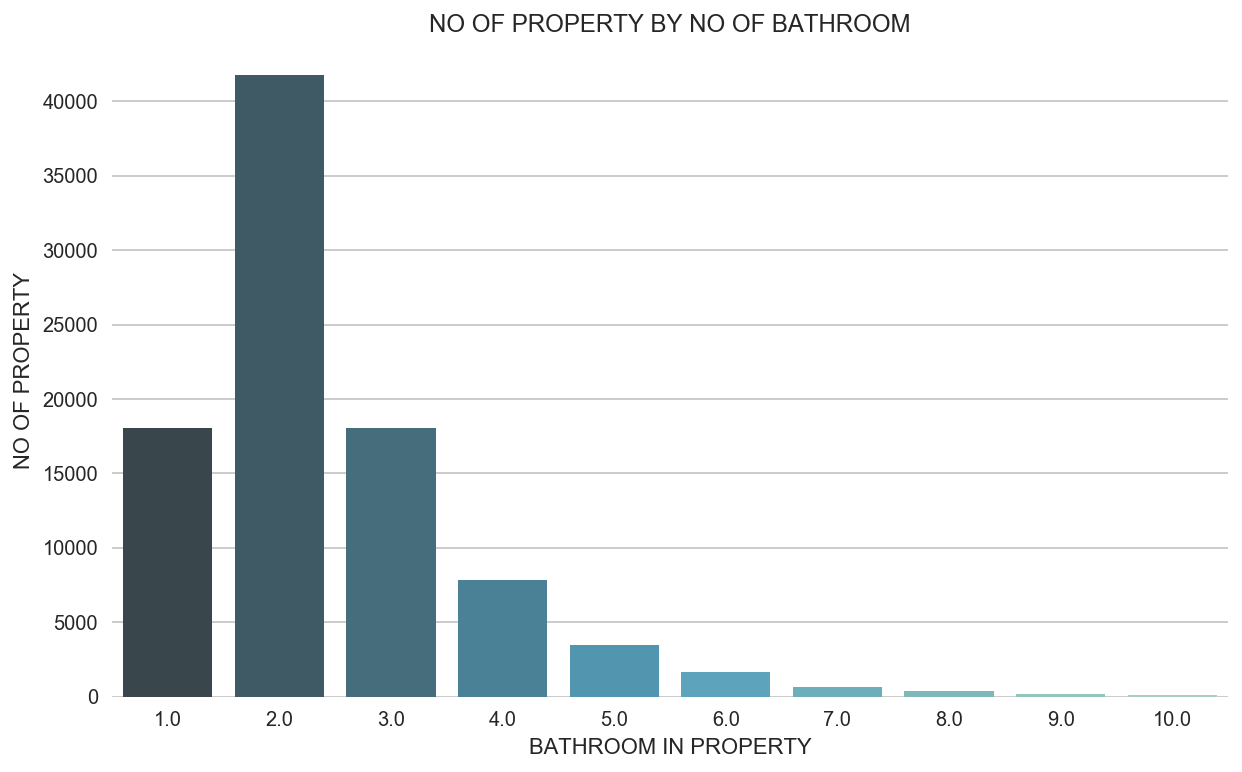

In [20]:
sns.set(style="whitegrid")
plot_data = df[df['Bath_room'] <= 10]
ax = sns.countplot(x="Bath_room", data=plot_data, palette='GnBu_d')
sns.despine(left=True, bottom=True)
plt.ylabel('NO OF PROPERTY')
plt.xlabel('BATHROOM IN PROPERTY')
plt.title('NO OF PROPERTY BY NO OF BATHROOM')

In [9]:
# df[(np.abs(stats.zscore(df)) < 3).all(axis=1)].describe()
# # Here i'm using boolian indexing to keep only Those points which have z score between -3 and 3


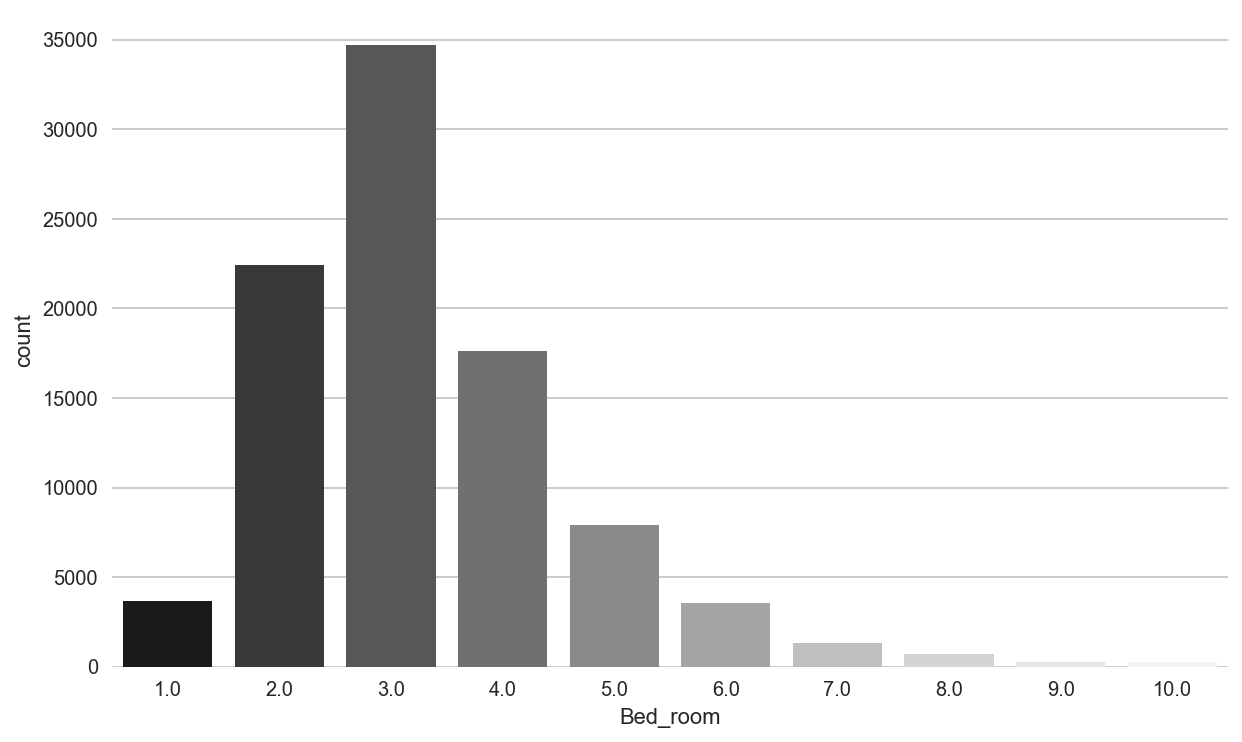

In [21]:
sns.set(style="whitegrid")
plot_data = df[df['Bed_room'] <= 10]
ax = sns.countplot(x="Bed_room", data=plot_data, palette='Greys_r')
sns.despine(left=True, bottom=True)


(0, 200)

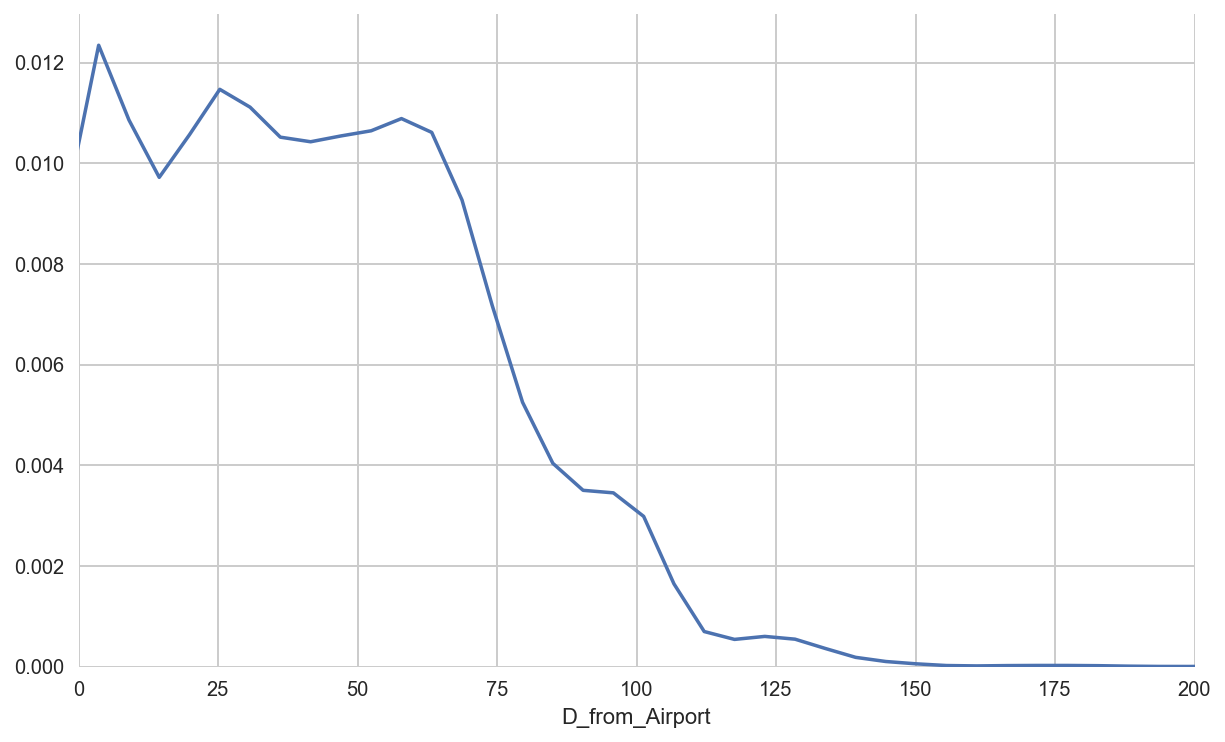

In [40]:
plot_data = df['D_from_Airport'].dropna()
ax = sns.distplot(plot_data, norm_hist=True, hist=False)
sns.despine(left=True, bottom=True)
plt.xlim(0,200)

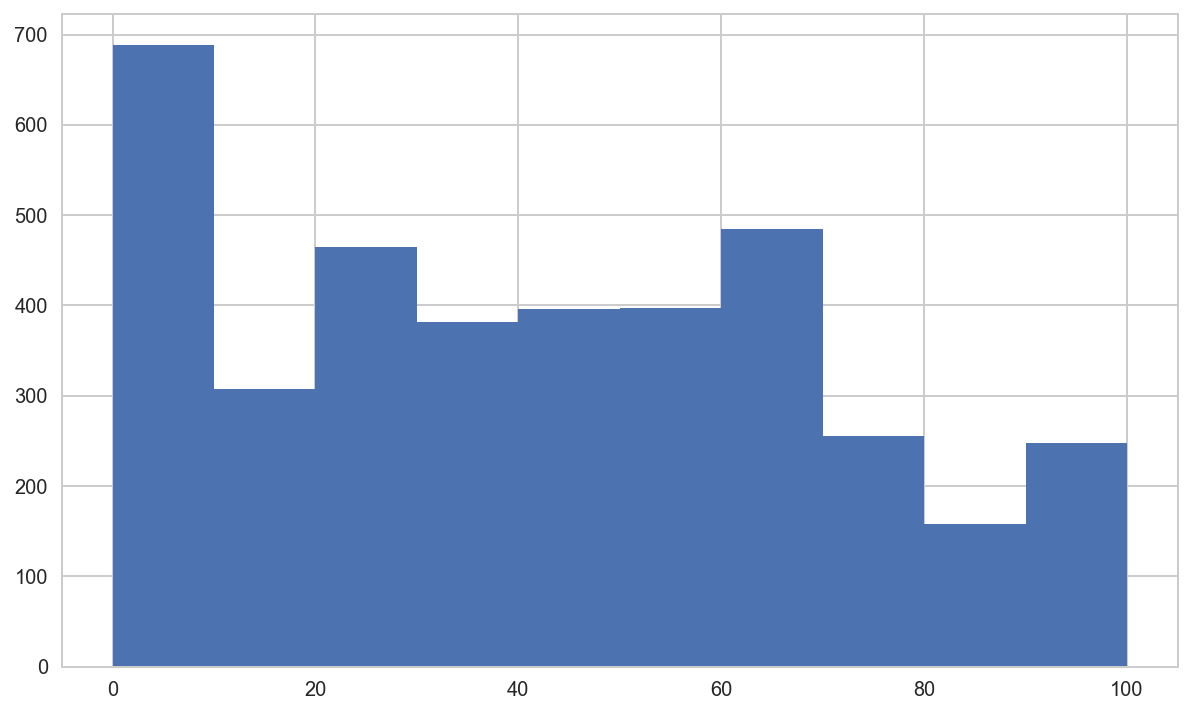

In [36]:
plt.hist(plot_data, bins=[0,10,20,30,40,50,60,70,80,90,100])
plt.show()


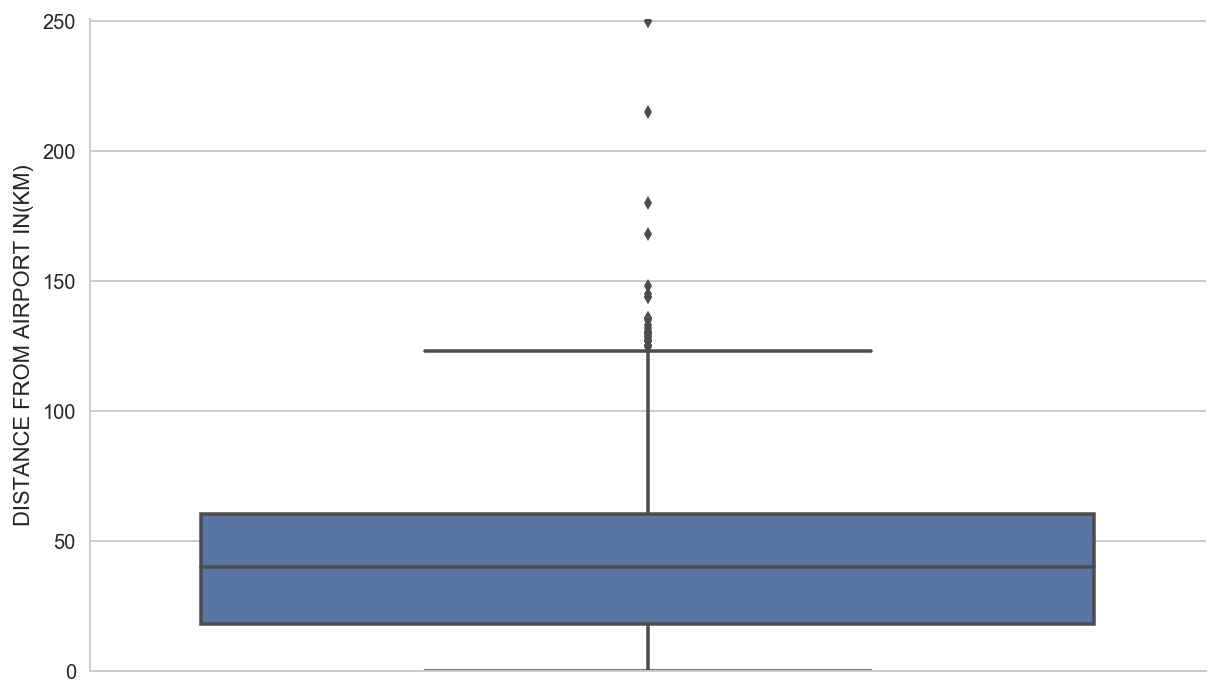

In [34]:
ax = sns.boxplot(y= plot_data)

sns.despine(left=True, bottom=True)
plt.ylabel("DISTANCE FROM AIRPORT IN(KM)")
sns.despine(top=True, right=True)
plt.ylim(0,251)
plt.show()